In [1]:
# Import necessary libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load the dataset
data = pd.read_csv("T-20 World cup 2022.csv")

In [3]:
# Display the first few rows of the dataset
print(data.head())


   comment_id  match_id match_name home_team away_team current_innings  \
0         130   1298179  ENG v PAK       PAK       ENG             PAK   
1         120   1298179  ENG v PAK       PAK       ENG             PAK   
2         110   1298179  ENG v PAK       PAK       ENG             PAK   
3         140   1298179  ENG v PAK       PAK       ENG             PAK   
4         150   1298179  ENG v PAK       PAK       ENG             PAK   

   innings_id  over  ball  runs  ... wicket_id  wkt_batsman_name  \
0           1     1     1     0  ...       NaN               NaN   
1           1     1     1     1  ...       NaN               NaN   
2           1     1     1     1  ...       NaN               NaN   
3           1     1     2     2  ...       NaN               NaN   
4           1     1     3     0  ...       NaN               NaN   

   wkt_bowler_name  wkt_batsman_runs  wkt_batsman_balls wkt_text  \
0              NaN               NaN                NaN      NaN   
1         

In [4]:
# Summary statistics
print(data.describe())

          comment_id      match_id   innings_id         over         ball  \
count    9814.000000  9.814000e+03  9814.000000  9814.000000  9814.000000   
mean    85399.661708  1.298157e+06     1.477787    10.082841     3.486856   
std     78951.670137  1.355630e+01     0.499532     5.623045     1.707484   
min       110.000000  1.298135e+06     1.000000     1.000000     1.000000   
25%     18030.000000  1.298145e+06     1.000000     5.000000     2.000000   
50%     29010.000000  1.298157e+06     1.000000    10.000000     3.000000   
75%    118040.000000  1.298169e+06     2.000000    15.000000     5.000000   
max    219090.000000  1.298179e+06     2.000000    20.000000     6.000000   

              runs   batsman1_id  batsman1_runs  batsman1_balls    bowler1_id  \
count  9814.000000  9.814000e+03    9814.000000     9814.000000  9.814000e+03   
mean      1.202262  5.377303e+05      15.691971       13.249440  6.226676e+05   
std       1.476730  3.181419e+05      16.454378       11.471307

In [5]:
# Check for missing values
print(data.isnull().sum())

comment_id              0
match_id                0
match_name              0
home_team               0
away_team               0
current_innings         0
innings_id              0
over                    0
ball                    0
runs                    0
shortText               0
isBoundary              0
isWide                  0
isNoball                0
batsman1_id             0
batsman1_name           0
batsman1_runs           0
batsman1_balls          0
bowler1_id              0
bowler1_name            0
bowler1_overs           0
bowler1_maidens         0
bowler1_runs            0
bowler1_wkts            0
batsman2_id             0
batsman2_name           0
batsman2_runs           0
batsman2_balls          0
bowler2_id            526
bowler2_name          526
bowler2_overs         526
bowler2_maidens       526
bowler2_runs          526
bowler2_wkts          526
wicket_id            9263
wkt_batsman_name     9263
wkt_bowler_name      9263
wkt_batsman_runs     9263
wkt_batsman_

In [6]:
#Handling missing values
data.dropna(subset=['bowler2_id', 'bowler2_name', 'bowler2_overs', 'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts'], inplace=True)
data.drop(columns=['wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text'], inplace=True)
data.drop(columns=['preText', 'postText','text'], inplace=True)

In [7]:
data.isnull().sum()

comment_id            0
match_id              0
match_name            0
home_team             0
away_team             0
current_innings       0
innings_id            0
over                  0
ball                  0
runs                  0
shortText             0
isBoundary            0
isWide                0
isNoball              0
batsman1_id           0
batsman1_name         0
batsman1_runs         0
batsman1_balls        0
bowler1_id            0
bowler1_name          0
bowler1_overs         0
bowler1_maidens       0
bowler1_runs          0
bowler1_wkts          0
batsman2_id           0
batsman2_name         0
batsman2_runs         0
batsman2_balls        0
bowler2_id            0
bowler2_name          0
bowler2_overs         0
bowler2_maidens       0
bowler2_runs          0
bowler2_wkts          0
wicket_id          8753
isRetiredHurt         0
dtype: int64

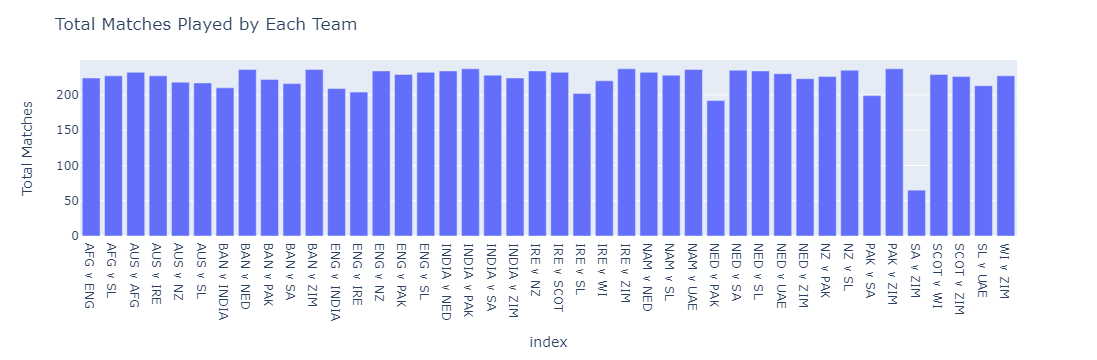

In [8]:
## 1. Team Performance
# Total wins by each team
team_wins = data.groupby('match_name')['match_name'].count()
team_wins_fig = px.bar(team_wins, x=team_wins.index, y=team_wins.values, labels={'x':'Team', 'y':'Total Matches'})
team_wins_fig.update_layout(title='Total Matches Played by Each Team')
team_wins_fig.show()

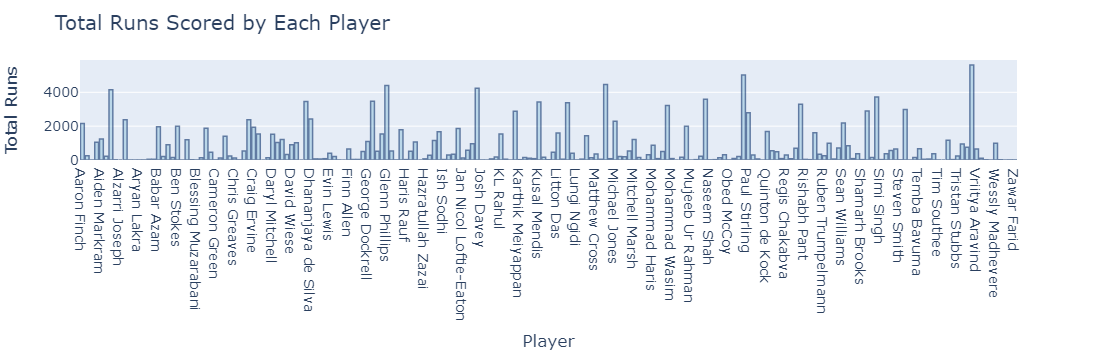

In [9]:
## 2. Player Performance
# Total runs by each player
player_runs = data.groupby('batsman1_name')['batsman1_runs'].sum().reset_index()
player_runs_fig = px.bar(player_runs, x='batsman1_name', y='batsman1_runs', labels={'batsman1_runs':'Total Runs', 'batsman1_name':'Player'})
# Customize the color and layout
player_runs_fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6) # Change bar color
player_runs_fig.update_layout(title='Total Runs Scored by Each Player', xaxis_title='Player', yaxis_title='Total Runs', font=dict(size=14)) # Increase font size
player_runs_fig.show()

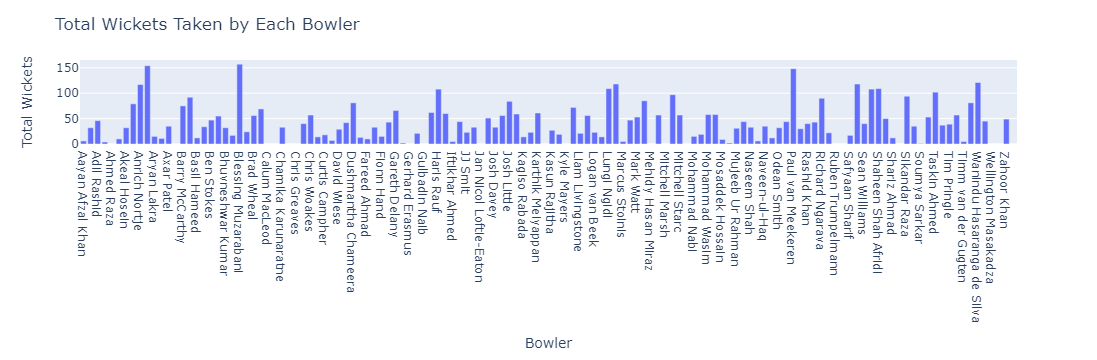

In [10]:
# Total wickets by each bowler
bowler_wickets = data.groupby('bowler1_name')['bowler1_wkts'].sum().reset_index()
bowler_wickets_fig = px.bar(bowler_wickets, x='bowler1_name', y='bowler1_wkts', labels={'bowler1_wkts':'Total Wickets', 'bowler1_name':'Bowler'})
bowler_wickets_fig.update_layout(title='Total Wickets Taken by Each Bowler')
bowler_wickets_fig.show()

In [11]:
## 3. Event Inference
# Count of boundaries
boundary_count = data['isBoundary'].sum()

# Count of wickets
wicket_count = data['wicket_id'].count()

In [12]:
## 4. Performance Evaluation
# Standout players by runs
top_run_scorers = player_runs.sort_values(by='batsman1_runs', ascending=False).head(10)


In [13]:
# Top wicket-takers
top_wicket_takers = bowler_wickets.sort_values(by='bowler1_wkts', ascending=False).head(10)

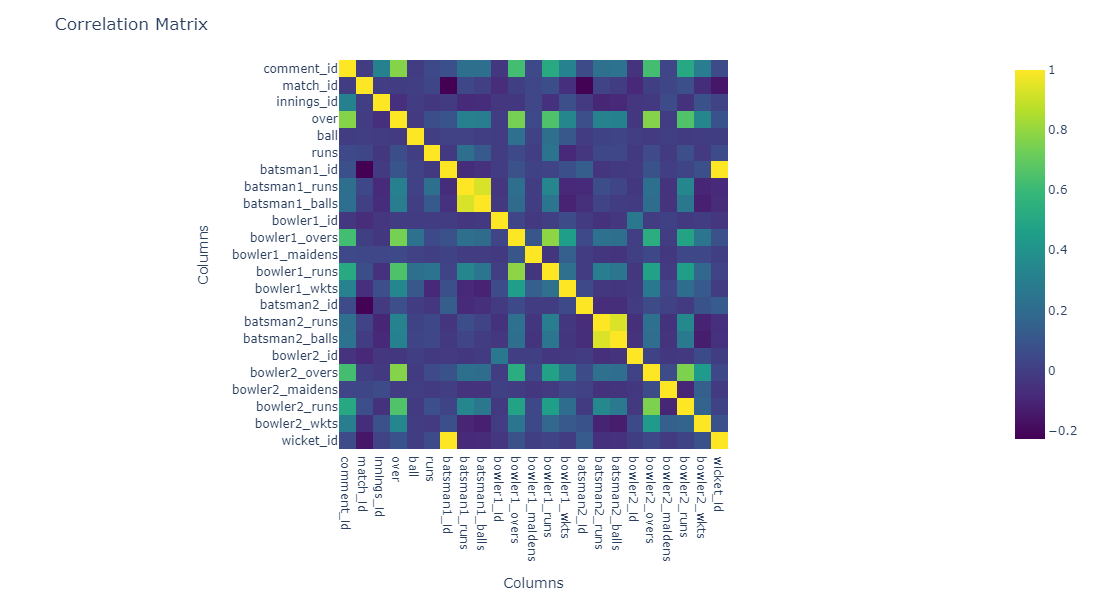

In [14]:
## 5. Statistical Insights
# Correlation matrix
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include='number')

# Correlation matrix
correlation_matrix = numeric_data.corr()

# Plot correlation matrix
correlation_matrix_fig = px.imshow(correlation_matrix, color_continuous_scale='viridis', labels={'x':'Columns', 'y':'Columns'})
correlation_matrix_fig.update_layout(
    title='Correlation Matrix',
    width=800,  # Adjust width
    height=600,  # Adjust height
)
correlation_matrix_fig.show()

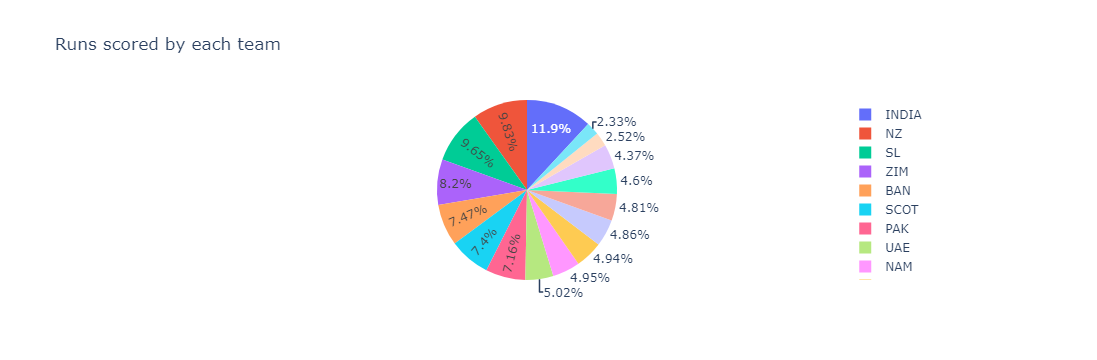

In [15]:
# Visualizations
## Runs scored by each team
runs_by_team = data.groupby('home_team')['home_team'].count().reset_index(name='Runs')
runs_by_team_fig = px.pie(runs_by_team, names='home_team', values='Runs', title='Runs scored by each team')
runs_by_team_fig.show()


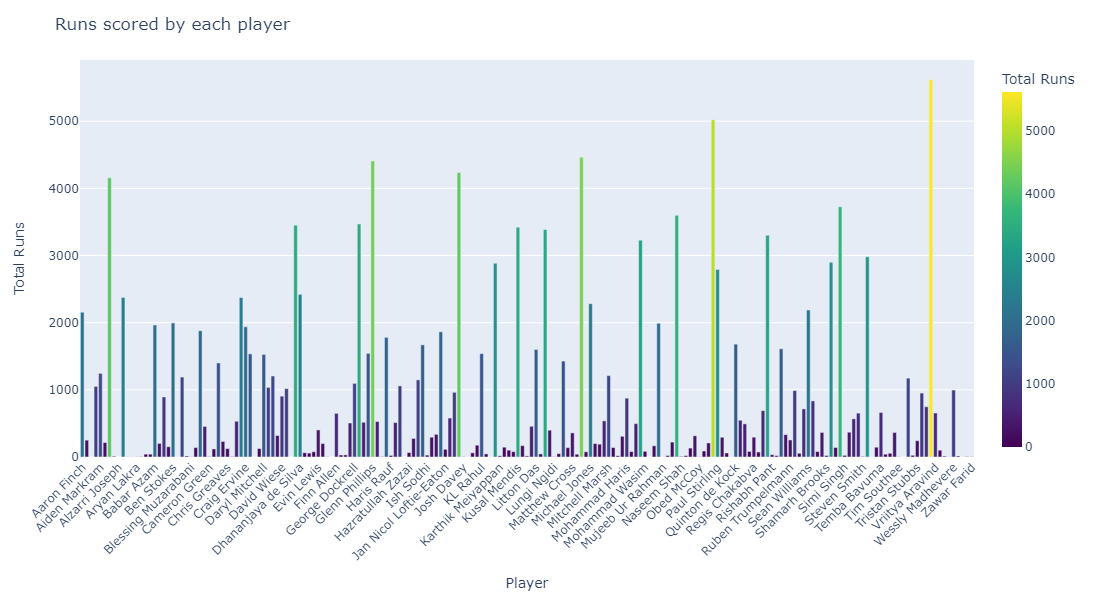

In [16]:
# Create the bar plot
runs_by_player_fig = px.bar(player_runs, x='batsman1_name', y='batsman1_runs', 
                             labels={'batsman1_runs':'Total Runs', 'batsman1_name':'Player'}, 
                             color='batsman1_runs',
                             color_continuous_scale=px.colors.sequential.Viridis,  # Choose a color palette
                             height=600,  # Adjust height
                             width=800)   # Adjust width

# Update the layout
runs_by_player_fig.update_layout(title='Runs scored by each player', 
                                  xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
                                  barmode='group',      # Display bars side by side
                                  coloraxis_colorbar=dict(title='Total Runs'),  # Add colorbar title
                                  coloraxis_colorbar_thickness=20)  # Increase colorbar thickness

# Show the plot
runs_by_player_fig.show()


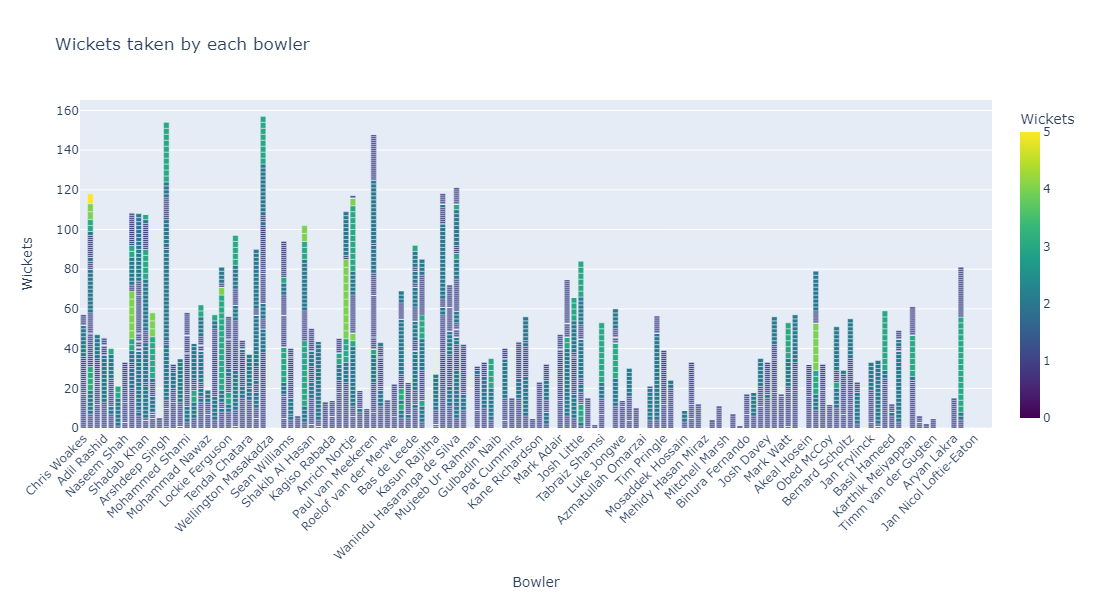

In [17]:
## Wickets taken by each bowler
# Create the bar plot
wickets_by_bowler_fig = px.bar(data, x='bowler1_name', y='bowler1_wkts', 
                                labels={'bowler1_wkts':'Wickets', 'bowler1_name':'Bowler'}, 
                                height=600,  # Adjust height
                                width=1000,  # Adjust width
                                title='Wickets taken by each bowler',
                                color='bowler1_wkts', 
                                color_continuous_scale=px.colors.sequential.Viridis)  # Choose a color palette

# Update the layout
wickets_by_bowler_fig.update_layout(xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
                                     coloraxis_colorbar=dict(title='Wickets'),  # Add colorbar title
                                     coloraxis_colorbar_thickness=20)  # Increase colorbar thickness

# Show the plot
wickets_by_bowler_fig.show()

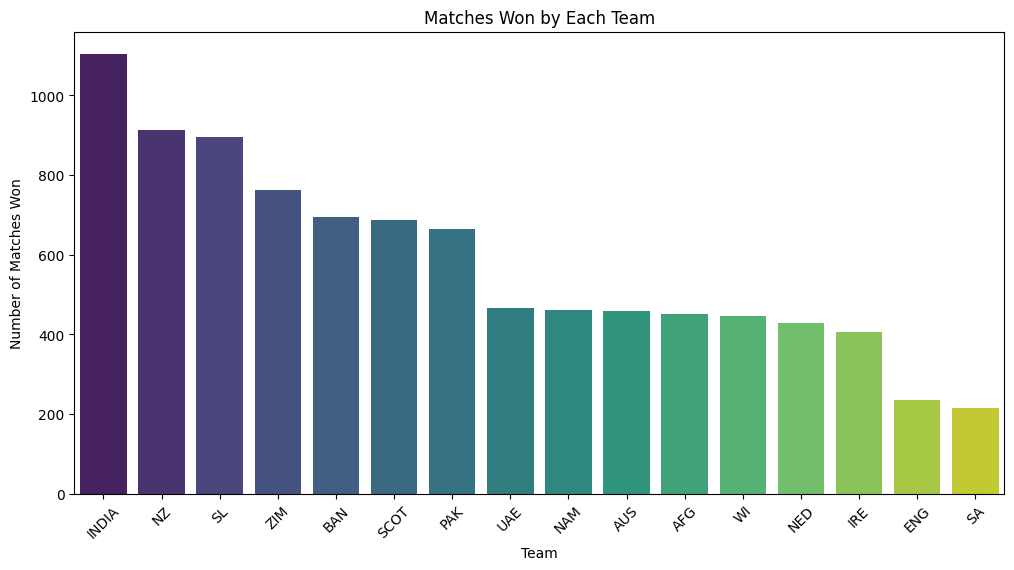

In [18]:
team_wins = data['home_team'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=team_wins.index, y=team_wins.values, palette="viridis")
plt.title('Matches Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches Won')
plt.xticks(rotation=45)
plt.show()

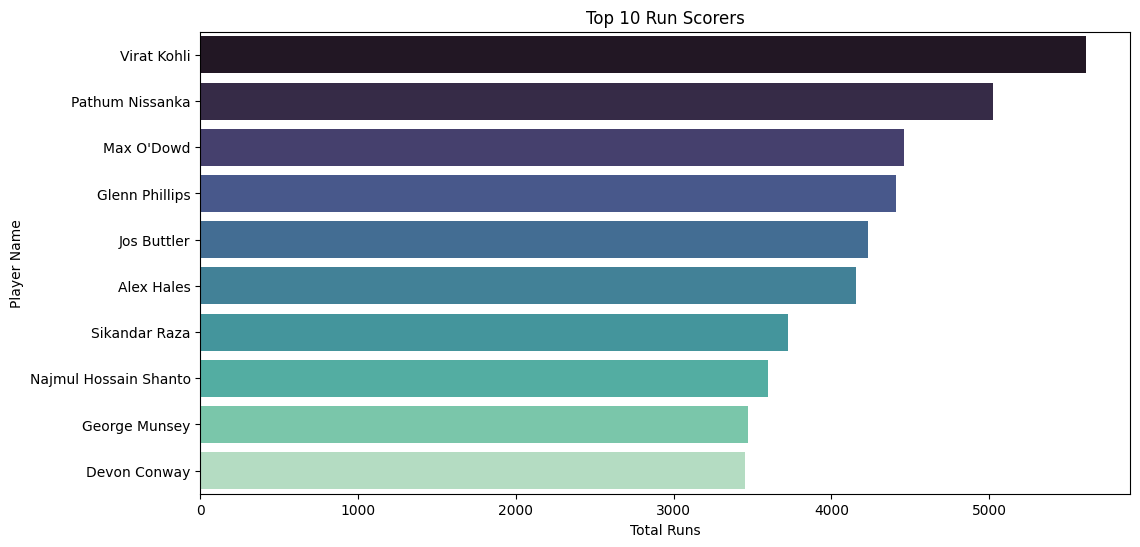

In [19]:
# Explore player performances
player_runs = data.groupby('batsman1_name')['batsman1_runs'].sum().reset_index()
player_runs = player_runs.sort_values(by='batsman1_runs', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='batsman1_runs', y='batsman1_name', data=player_runs.head(10), palette="mako")
plt.title('Top 10 Run Scorers')
plt.xlabel('Total Runs')
plt.ylabel('Player Name')
plt.show()

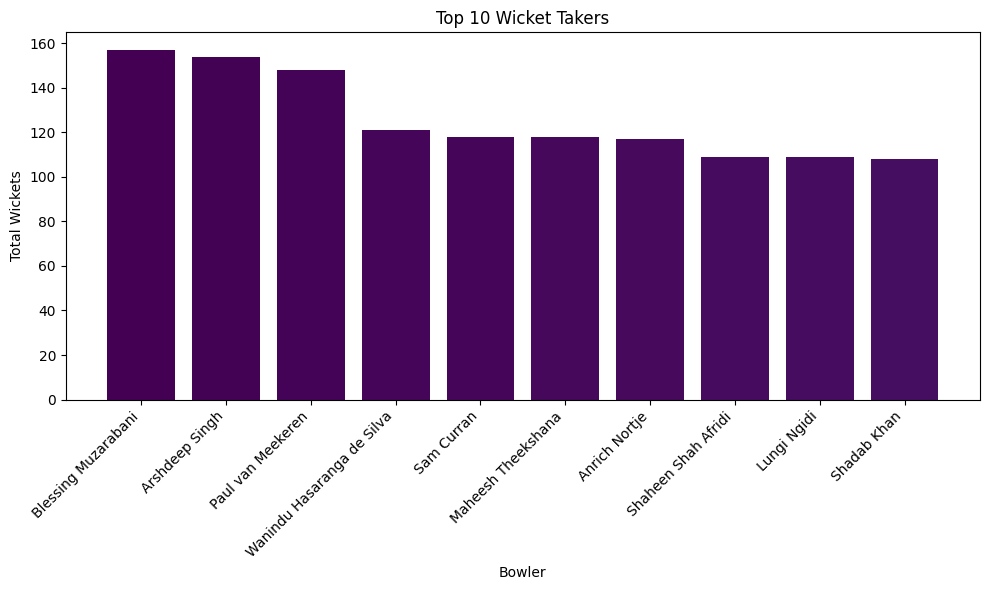

In [20]:
from bokeh.io import output_file, show
from bokeh.plotting import figure, show
from bokeh.palettes import Viridis256  

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_wicket_takers['bowler1_name'], top_wicket_takers['bowler1_wkts'], color=Viridis256[:10])  # Use top 10 colors from palette
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.title('Top 10 Wicket Takers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


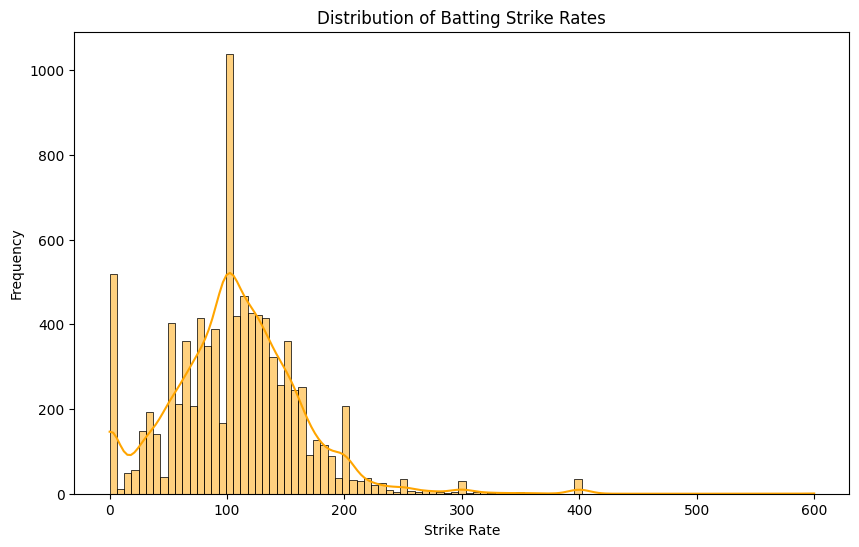

In [21]:
# Statistical Insights
# Calculate batting strike rates
data['batsman1_strike_rate'] = (data['batsman1_runs'] /data['batsman1_balls']) * 100
# Calculate bowling economy rates
data['bowler1_economy_rate'] = (data['bowler1_runs'] / data['bowler1_overs'])
# Create visualizations
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='batsman1_strike_rate', kde=True, color='orange')
plt.title('Distribution of Batting Strike Rates')
plt.xlabel('Strike Rate')
plt.ylabel('Frequency')
plt.show()

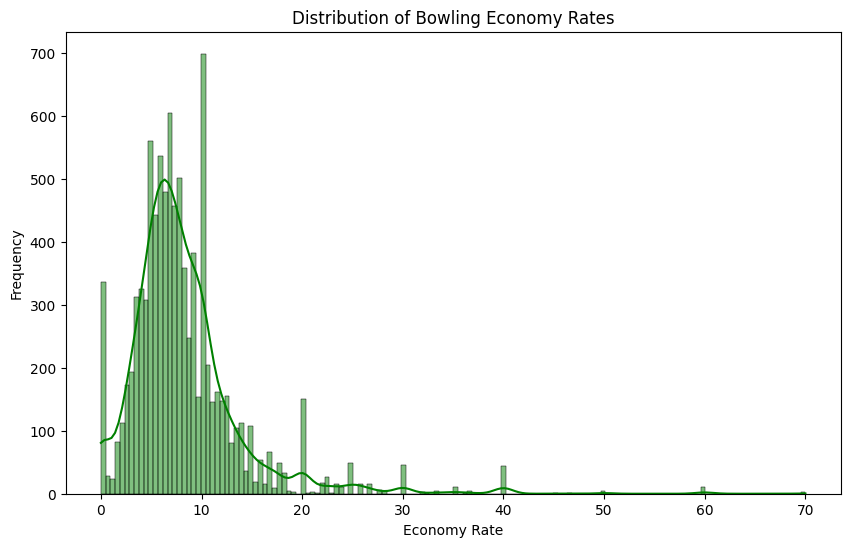

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='bowler1_economy_rate', kde=True, color='green')
plt.title('Distribution of Bowling Economy Rates')
plt.xlabel('Economy Rate')
plt.ylabel('Frequency')
plt.show()